In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [8]:
# Object and Earth parameters
coef = 0.5 # drag coefficient
x_area = 0.1 # m^2
mass = 100 # kg
rho = 1.225 # kg/m^3
g_vec = np.array([0, -9.8]) # m/s^3

# Set simulation parameters
sim_time = 1000 # duration
n_steps = 10000 # number of calculations
dt = sim_time/n_steps

In [45]:
def compute_trajectory(y0, vx0, m):

    """ 
    Function that takes initial altitude, 
    horizontal velocity, and mass, and computes a
    2D trajectory
    """

    # Initialize arrays
    t = np.zeros(n_steps + 1)
    r = np.zeros((n_steps + 1, 2))
    v = np.zeros((n_steps + 1, 2))

    # Set starting pos and vel from function inputs
    r[0] = [0.0, y0]
    v[0] = [vx0, 0.0]

    # Will later index of moment of impact
    impact_idx = None

    # For loop to update position and velocity
    for i in range(n_steps):

        # Calculate speed from vel
        speed    = np.linalg.norm(v[i])

        # Compute drag direction as opp. to vel, unless vel=0
        drag_dir = -v[i]/speed if speed > 0 else np.array([0.0, 0.0])

        # Compute force of drag 
        F_drag   = 0.5 * coef * x_area * speed**2 * drag_dir

        # Compute total acceleration
        acc      = g_vec + F_drag / m

        # Update time, position and vel using Euler method
        t[i+1] = t[i] + dt
        r[i+1] = r[i] + v[i] * dt
        v[i+1] = v[i] + acc  * dt

        # Assign impact index if crash has happened
        if r[i+1, 1] <= 0.0:
            r[i+1, 1] = 0.0
            impact_idx = i + 1
            break

    # Update impact index if not crashed yet        
    if impact_idx is None:
        impact_idx = n_steps

    # Converts index to seconds
    impact_time = t[impact_idx]

    # Cuts off all arrays when crash has happened
    last = impact_idx + 1        
    t, r, v = t[:last], r[:last], v[:last]
    return t, r, v, impact_time



In [46]:
# For fun, compute escape velocity for 10km altitude
G = 6.674e-11
M = 5.972e24
R = 6.371e6 
v_esc = np.sqrt((2*G*M)/(10000+R))
print("Escape velocity at 10km {:.2f}".format(v_esc), "m/s")

Escape velocity at 10km 11176.96 m/s


## Effects of initial altitude

In [ ]:
# Run simulations
t1, r1, v1, impact_time1 = compute_trajectory(10_000, 10000, 100)
t2, r2, v2, impact_time2 = compute_trajectory(10_000, 1000, 100)
t3, r3, v3, impact_time3 = compute_trajectory(10_000, 0, 100)

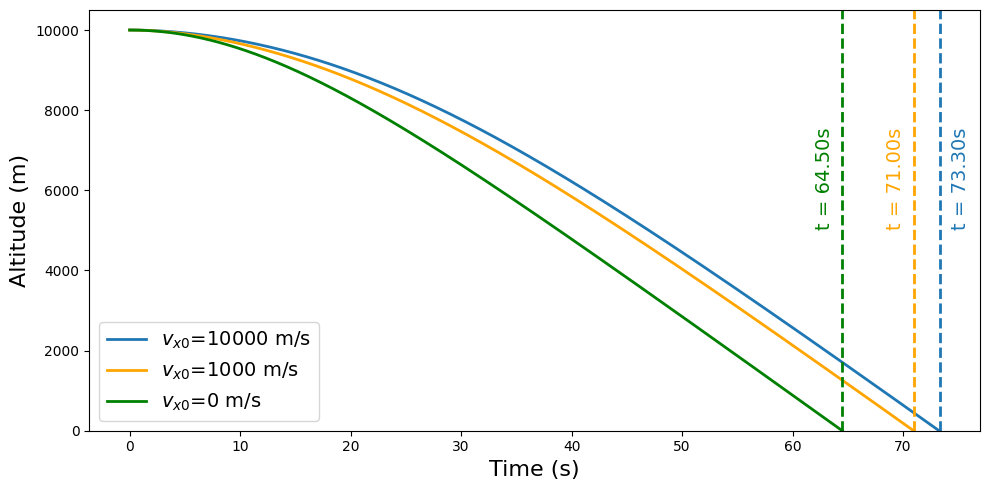

In [49]:
# Plot the three trajectories
plt.figure(figsize=(10, 5))

# Altitude vs time 
plt.plot(t1, r1[:, 1], label=r'$v_{x0}$=10000 m/s', linewidth=2)
plt.plot(t2, r2[: ,1], label=r'$v_{x0}$=1000 m/s', color='orange', linewidth=2)
plt.plot(t3, r3[:, 1], label=r'$v_{x0}$=0 m/s', color='green', linewidth=2)

# Plot vertical lines and text for impact times
plt.axvline(impact_time1, linestyle='--', linewidth=2)
plt.text(impact_time1 + 1, 5000, f"t = {impact_time1:.2f}s", rotation=90, color='#1f77b4', va='bottom', fontsize=14)
plt.axvline(impact_time2, linestyle='--', color='orange', linewidth=2)
plt.text(impact_time2 - 2.5, 5000, f"t = {impact_time2:.2f}s", rotation=90, color='orange', va='bottom', fontsize=14)
plt.axvline(impact_time3, linestyle='--', color='green', linewidth=2)
plt.text(impact_time3 -2.5, 5000, f"t = {impact_time3:.2f}s", rotation=90, color='green', va='bottom', fontsize=14)

# Labels and limits
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Altitude (m)", fontsize=16)
plt.ylim(0,10500)
plt.grid(False)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()


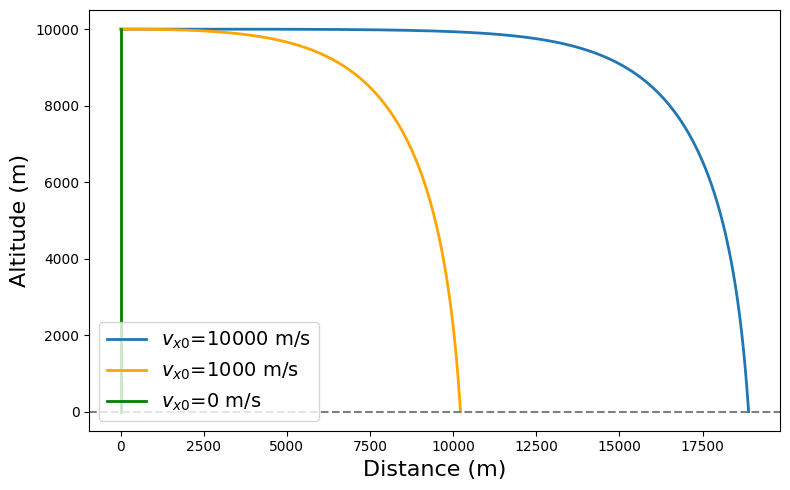

In [51]:
# Plot the three trajectories
plt.figure(figsize=(8, 5))

# Distance vs Altitude
plt.plot(r1[:, 0], r1[:, 1], label=r'$v_{x0}$=10000 m/s', linewidth=2)
plt.plot(r2[: , 0], r2[: , 1], label=r'$v_{x0}$=1000 m/s', color='orange', linewidth=2)
plt.plot(r3[: , 0], r3[: , 1], label=r'$v_{x0}$=0 m/s', color='green', linewidth=2)

# Labels and limits
plt.xlabel("Distance (m)", fontsize=16)
plt.ylabel("Altitude (m)", fontsize=16)
plt.axhline(0, color='grey', linestyle='--')
plt.grid(False)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

## Effect of mass

In [52]:
# Run simulations
t1, r1, v1, impact_time1 = compute_trajectory(10_000, 0, 10000)
t2, r2, v2, impact_time2 = compute_trajectory(10_000, 0, 100)
t3, r3, v3, impact_time3 = compute_trajectory(10_000, 0, 1)

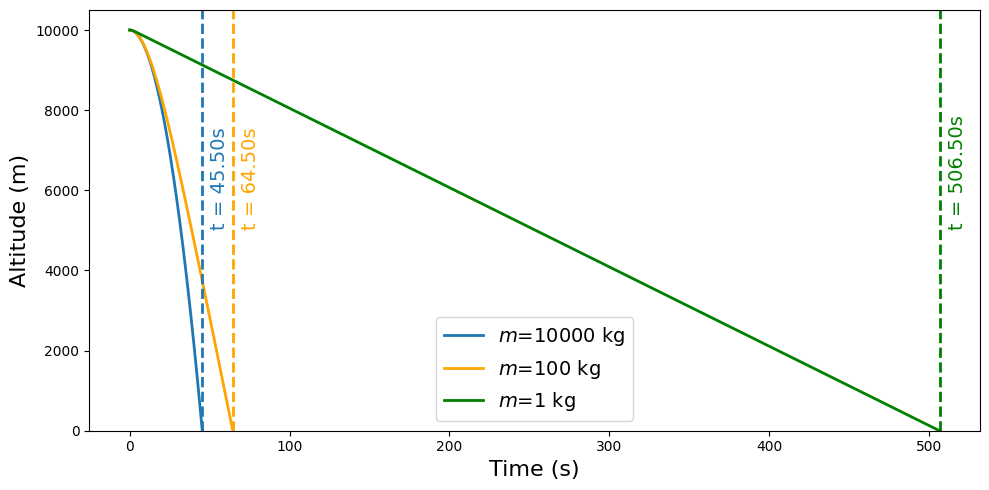

In [60]:
# Plot the three trajectories
plt.figure(figsize=(10, 5))

# Altitude vs time 
plt.plot(t1, r1[:, 1], label=r'$m$=10000 kg', linewidth=2)
plt.plot(t2, r2[: ,1], label=r'$m$=100 kg', color='orange', linewidth=2)
plt.plot(t3, r3[:, 1], label=r'$m$=1 kg', color='green', linewidth=2)

# Plot vertical lines and text for impact times
plt.axvline(impact_time1, linestyle='--', linewidth=2)
plt.text(impact_time1 + 5, 5000, f"t = {impact_time1:.2f}s", rotation=90, color='#1f77b4', va='bottom', fontsize=14)
plt.axvline(impact_time2, linestyle='--', color='orange', linewidth=2)
plt.text(impact_time2 + 5, 5000, f"t = {impact_time2:.2f}s", rotation=90, color='orange', va='bottom', fontsize=14)
plt.axvline(impact_time3, linestyle='--', color='green', linewidth=2)
plt.text(impact_time3 +5, 5000, f"t = {impact_time3:.2f}s", rotation=90, color='green', va='bottom', fontsize=14)

# Labels and limits
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Altitude (m)", fontsize=16)
plt.ylim(0,10500)
plt.grid(False)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

## Effects of initial altitude

In [61]:
# Run simulations
t1, r1, v1, impact_time1 = compute_trajectory(10_000_000, 0, 100)
t2, r2, v2, impact_time2 = compute_trajectory(100_000, 0, 100)
t3, r3, v3, impact_time3 = compute_trajectory(10_000, 0, 100)

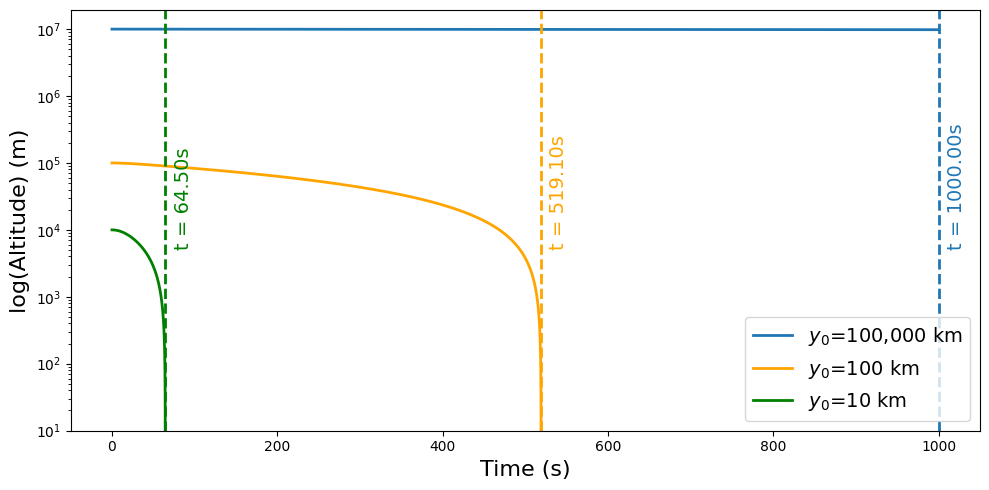

In [67]:
# Plot the three trajectories
plt.figure(figsize=(10, 5))

# Altitude vs time 
plt.plot(t1, r1[:, 1], label=r'$y_0$=100,000 km', linewidth=2)
plt.plot(t2, r2[: ,1], label=r'$y_0$=100 km', color='orange', linewidth=2)
plt.plot(t3, r3[:, 1], label=r'$y_0$=10 km', color='green', linewidth=2)

# Plot vertical lines and text for impact times
plt.axvline(impact_time1, linestyle='--', linewidth=2)
plt.text(impact_time1 + 10, 5000, f"t = {impact_time1:.2f}s", rotation=90, color='#1f77b4', va='bottom', fontsize=14)
plt.axvline(impact_time2, linestyle='--', color='orange', linewidth=2)
plt.text(impact_time2 + 10, 5000, f"t = {impact_time2:.2f}s", rotation=90, color='orange', va='bottom', fontsize=14)
plt.axvline(impact_time3, linestyle='--', color='green', linewidth=2)
plt.text(impact_time3 +10, 5000, f"t = {impact_time3:.2f}s", rotation=90, color='green', va='bottom', fontsize=14)

# Labels and limits
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("log(Altitude) (m)", fontsize=16)
plt.yscale('log')
plt.grid(False)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()